In [42]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.fft import fft, ifft, fftfreq
import matplotlib
import pandas as pd
from scipy.signal import argrelextrema
from matplotlib.colors import LogNorm
from matplotlib import colors
import seaborn as sns 
import math
from scipy import signal
from PIL import Image
import numpy as np

matplotlib.rcParams.update({'font.size': 25})

This script calculates entropy and contrast to quantify imaging qualities

In [2]:
def entropy(img):
    g_sq = np.square(img)
    
    S = np.sum(g_sq)
    
    Eg = -np.sum((g_sq/S)*np.log(g_sq/S))
    
    return Eg
    
def contrast(img):
    g_sq = np.square(img)
    S = np.sum(g_sq)
    
    g_quat = np.square(g_sq)
    a = np.sum(g_quat)
    
    M = img.shape[0]
    N = img.shape[1]
    
    result = np.sqrt((M*N/(S**2))*a-1)
    
    return result

In [47]:
file_exp = "43"
#folder_output = '/home/qiwen/Github/SAR_project/code/Analysis/motion_error_Sep2022/exp%s/'%file_exp
folder_output = '/home/wq3939390/SAR_project/code/Analysis/motion_error_Sep2022/exp%s/'%file_exp

In [48]:
ch = 1

arr_delta_idx_error = np.array([0,1,2,3,4,8,16,32,64,128,256])
arr_entropy = []
arr_contrast = []
arr_S = []
for delta_idx_error in arr_delta_idx_error:
    #img = np.genfromtxt(folder_output+'X_and_Y/MotionError_mu_%d/final_result_RDA_ch%d_hamming_window.csv'%(delta_idx_error,ch),delimiter=',') 
    img = np.genfromtxt(folder_output+'MotionError_mu_%d/final_result_RDA_ch%d_no_window.csv'%(delta_idx_error,ch),delimiter=',') 
    arr_entropy.append(entropy(img))
    arr_contrast.append(contrast(img))
    
    g_sq = np.square(img)
    S = np.sum(g_sq)
    arr_S.append(S)

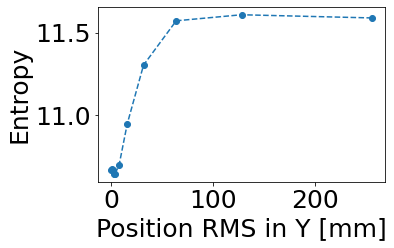

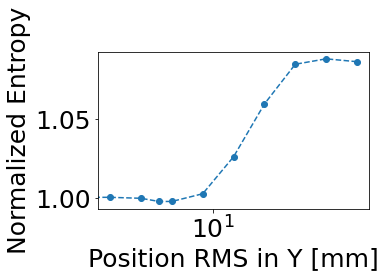

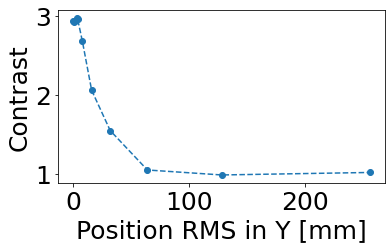

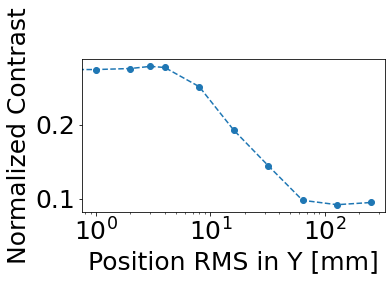

In [49]:
arr_positionRMS = arr_delta_idx_error


plt.plot(arr_positionRMS, arr_entropy,'o--')
plt.xlabel('Position RMS in Y [mm]')
plt.ylabel('Entropy')
plt.tight_layout()
plt.savefig(folder_output+'entropy.jpg')
plt.show()

plt.plot(arr_positionRMS, arr_entropy/arr_entropy[0],'o--')
plt.xlabel('Position RMS in Y [mm]')
plt.ylabel('Normalized Entropy')
plt.xscale('log')
plt.tight_layout()
plt.savefig(folder_output+'entropy_log.jpg')
plt.show()

plt.plot(arr_positionRMS, arr_contrast,'o--')
plt.xlabel('Position RMS in Y [mm]')
plt.ylabel('Contrast')
plt.tight_layout()
plt.savefig(folder_output+'contrast.jpg')
plt.show()


plt.plot(arr_positionRMS, arr_contrast/arr_entropy[0],'o--')
plt.xlabel('Position RMS in Y [mm]')
plt.ylabel('Normalized Contrast')
plt.xscale('log')
plt.tight_layout()
plt.savefig(folder_output+'contrast_log.jpg')
plt.show()

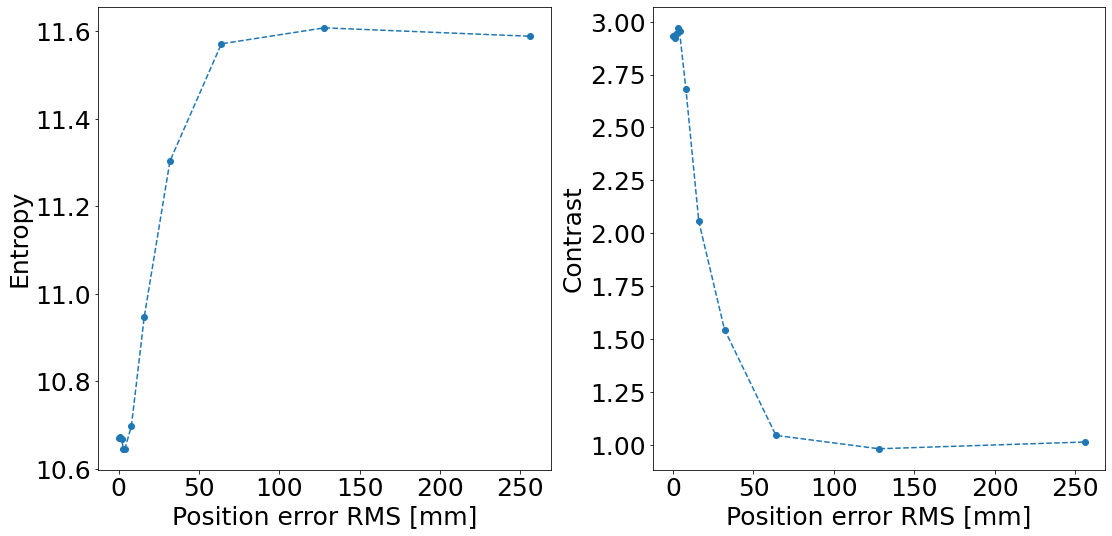

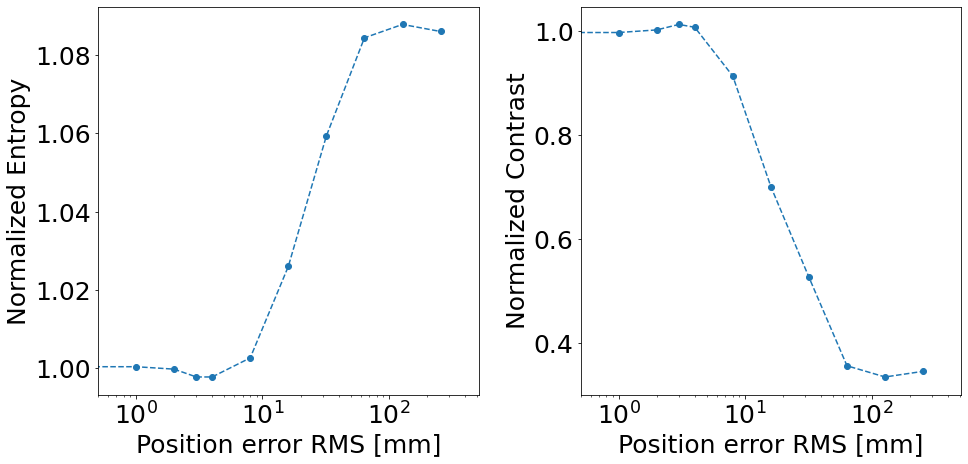

In [50]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,8))

ax1.plot(arr_positionRMS, arr_entropy,'o--')
ax1.set_xlabel('Position error RMS [mm]')
ax1.set_ylabel('Entropy')
ax2.plot(arr_positionRMS, arr_contrast,'o--')
ax2.set_xlabel('Position error RMS [mm]')
ax2.set_ylabel('Contrast')
plt.tight_layout()

plt.savefig(folder_output+'entropy_contrast_linear.jpg')
plt.show()


fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,7))

ax1.plot(arr_positionRMS, arr_entropy/arr_entropy[0],'o--')
ax1.set_xlabel('Position error RMS [mm]')
ax1.set_ylabel('Normalized Entropy')
ax1.set_xscale('log')
ax1.set_xlim(0.5,512)
#ax1.set_ylim(0.95,1.25)

ax2.plot(arr_positionRMS, arr_contrast/arr_contrast[0],'o--')
ax2.set_xlabel('Position error RMS [mm]')
ax2.set_ylabel('Normalized Contrast')
ax2.set_xscale('log')
ax2.set_xlim(0.5,512)
#ax2.set_ylim(0.1,1.15)

plt.tight_layout()
plt.savefig(folder_output+'entropy_contrast_log.jpg')
plt.show()

In [51]:
print(arr_entropy[0])
print(arr_contrast[0])

10.670034432924844
2.9330183588734005


11.40588405761107
0.9923998173466756
354741.2577380081


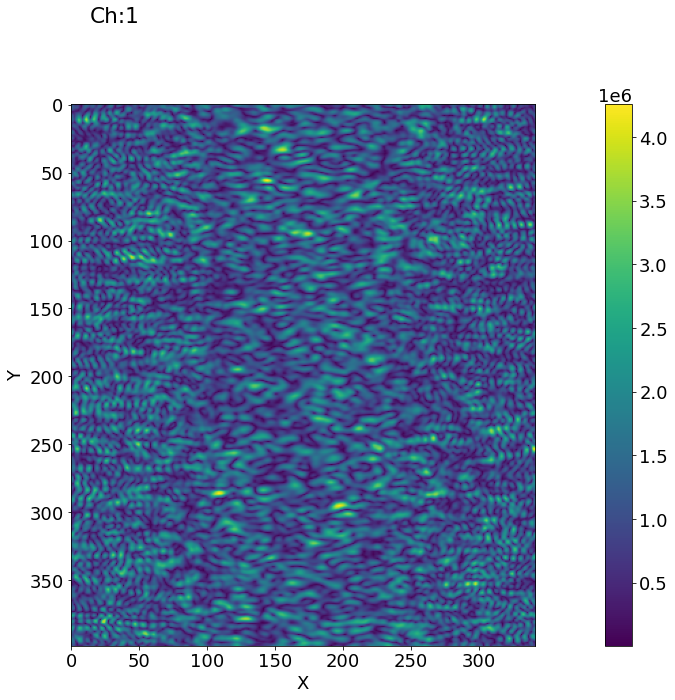

In [21]:
delta_idx_error =256
ch = 1
img = np.genfromtxt(folder_output+'X_and_Y/MotionError_mu_%d/final_result_RDA_ch%d_hamming_window.csv'%(delta_idx_error,ch),delimiter=',') 


print(entropy(img))
print(contrast(img))


gy, gx = np.gradient(img)
gnorm = np.sqrt(gx**2 + gy**2)
sharpness = np.average(gnorm)
print(sharpness)

fig, ax = plt.subplots(1,1, figsize=(20,10))
fig.suptitle('Ch:%d'%(ch))
z2_plot = plt.imshow(img,vmin=np.min(img), vmax=np.max(img))
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.colorbar(z2_plot,ax=ax)
fig.tight_layout(rect=[0, 0, 1, 0.95])


In [16]:
img

array([[ 77236.50030646, 316207.82714686, 395560.47271464, ...,
        424514.68977531, 410494.84695549, 223550.09115745],
       [179094.50877532, 420998.53802726, 488759.39731177, ...,
        509832.70022428, 442960.22189745, 212541.59831997],
       [273958.61164072, 461545.9486154 , 497187.03892495, ...,
        513187.24489926, 419638.98112111, 227990.17862237],
       ...,
       [221931.53436949, 297226.81927324, 409064.89122086, ...,
        352853.86639363, 308256.57853553, 254934.52020817],
       [130087.68534479, 176159.36273784, 304273.8641724 , ...,
        267909.75925378, 330156.14751465, 279522.51099249],
       [ 22347.82953106, 201234.84431423, 304913.74086613, ...,
        317448.31691972, 361706.26380011, 251273.85862773]])

In [17]:
g_sq = np.square(img)
S = np.sum(g_sq)
np.max(np.log(g_sq/S))
Eg = -np.sum((g_sq/S)*np.log(g_sq/S))
print(Eg)

9.512909693005831


In [18]:


S = 1

Eg = -np.sum((g_sq/S)*np.log(g_sq/S))
